Vamos a usar la librería `math`, que define funciones elementales y constantes como $\pi$, y la librería `matplotlib` para generar una gráfica para visualizar nuestra función error. 

In [18]:
import math as math
import numpy as np
import matplotlib.pyplot as plt
Pi = math.pi

Ahora, definimos el error relativo y absoluto para nuestro ejemplo de la aproximación $\sin(\theta) \approx \theta$:

In [41]:
def ea(theta):
    return  math.fabs(math.sin(theta) - theta)

def er(theta):
    return  math.fabs(ea(theta)/math.sin(theta) )



Vamos a tomar cien valores de ángulos entre $0$ y $2\pi$, y a calcular los errores para cada uno de ellos:

In [55]:
N = 1000
theta_list = [3*Pi*x/N for x in range(1,N)]
ea_list = [ea(3*Pi*x/N) for x in range(1,N)]
er_list = [er(3*Pi*x/N) for x in range(1,N)]


Graficamos el error absoluto

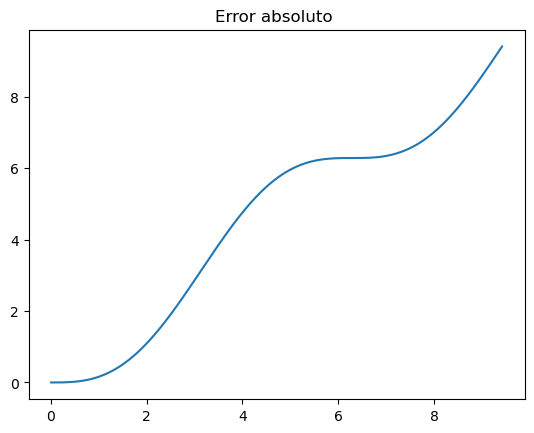

In [59]:
plt.plot(theta_list, ea_list)
plt.title('Error absoluto ')
plt.show()

Así como el error relativo

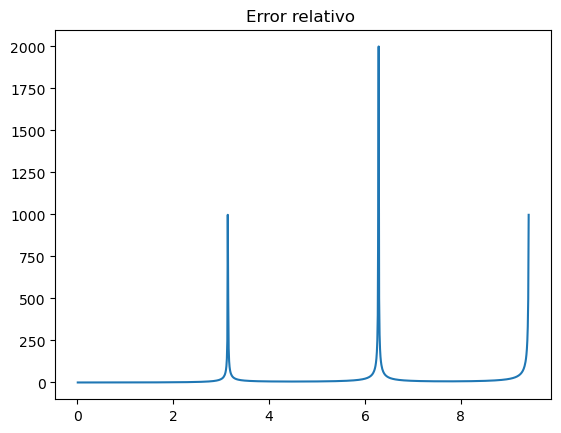

In [60]:
plt.plot(theta_list, er_list)
plt.title('Error relativo ')
plt.show()

Miremos el error de representación

In [82]:
a = 0.1
a

0.1

In [89]:
format(a,'.34f')

'0.1000000000000000055511151231257827'

In [88]:

total = 0.0
for i in range(10):
    total += 0.1
print(f"Expected Result: 1.0\nActual Result: {total}")


Expected Result: 1.0
Actual Result: 0.9999999999999999


Vamos a ejemplificar la acumulación de errores en cálculos con punto flotante

In [85]:
def iternum(n):
    result = 1
    
    for i in range(n):
        result += 1/3

    for i in range(n):
        result -= 1/3
    return result

iternum(10000)



1.0000000000001166

Ahora con más iteraciones:

In [90]:

format(iternum(100000000), '.30f')

'1.000000000496402252636585217260'

In [95]:

format(iternum(10),'.30f')

'0.999999999999999111821580299875'

Miremos como el error cambia al aumentar el número de iteraciones en potencias de diez. 

In [96]:
[1-iternum(10**x) for x in range(10)]

[0.0,
 8.881784197001252e-16,
 -2.220446049250313e-16,
 -6.439293542825908e-15,
 -1.1657341758564144e-13,
 -1.921351966416296e-12,
 2.7201352281736035e-11,
 -3.096833900428919e-11,
 -4.964022526365852e-10,
 -7.94607335485864e-09]

In [98]:
[1-iternum(10**x) for x in range(8)]

[0.0,
 8.881784197001252e-16,
 -2.220446049250313e-16,
 -6.439293542825908e-15,
 -1.1657341758564144e-13,
 -1.921351966416296e-12,
 2.7201352281736035e-11,
 -3.096833900428919e-11]

/tmp/ipykernel_979849/4011027480.py:4: RuntimeWarning: invalid value encountered in log
  return x**6+ 0.1*np.log(1+3*(1-x))


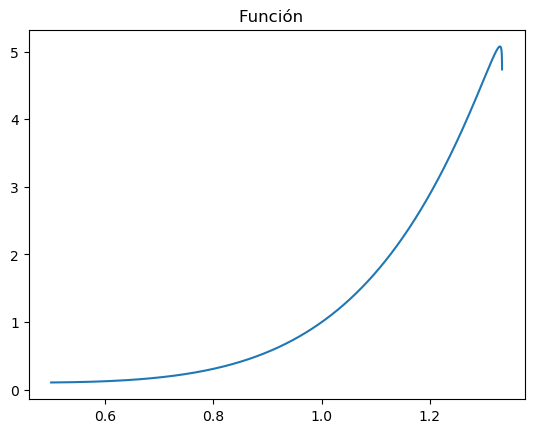

In [27]:
N = 10000
x_list = np.linspace(0.5,1.5,N)
def func(x):
    return x**6+ 0.1*np.log(1+3*(1-x))
y_list = func(x_list)

plt.plot(x_list, y_list)
plt.title('Función  ')
plt.show()




In [68]:
import sympy as sy

In [143]:
x = sy.symbols('x')
f = sy.besselj(0,x)
g = sy.series(f,x,0,3)
g

1 - x**2/4 + O(x**3)

In [144]:
g = g.removeO()
g

1 - x**2/4

In [145]:
fx = sy.lambdify(x, f)
gx = sy.lambdify(x, g)


In [146]:
fx(0.3)-gx(0.3)

0.0001262465382960709

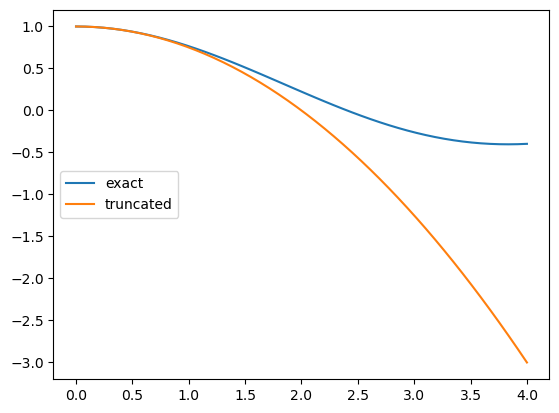

In [149]:
X = np.linspace(0,4)
Yf = fx(X)
Yg = gx(X)

plt.plot(X,Yf, label='exact')
plt.plot(X,Yg, label='truncated')
plt.legend(loc=6)
plt.show()

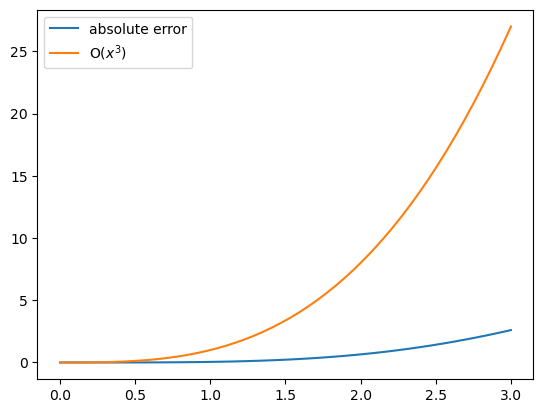

In [148]:
X = np.linspace(0,3)
plt.plot(X,np.abs(Yf-Yg), label='absolute error' )
plt.plot(X, 1*X**3, label='O($x^3$)' )
plt.legend(loc=2)
plt.show()
